In [1]:
from models import WindowObjectDetector
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import tensorflow as tf

2021-08-31 18:30:31.474793: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
model = WindowObjectDetector(load_model('../checkpoints/resnet50-best.h5'), multires=True)

2021-08-31 18:30:32.683477: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-31 18:30:32.709000: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-31 18:30:32.709381: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.683GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2021-08-31 18:30:32.709407: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-31 18:30:32.711919: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-08-31 18:30:32.711952: I tensorflow/stream_executor/platfo

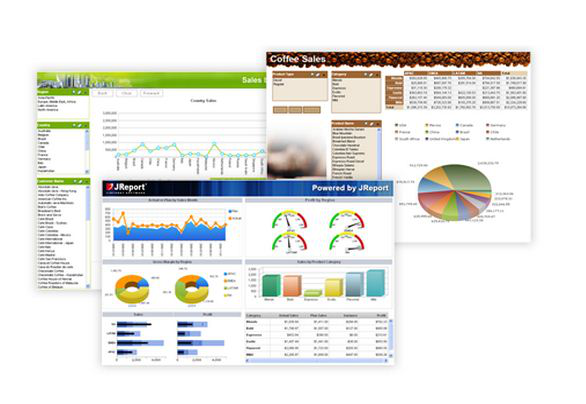

In [3]:
img = load_img('../data/gallery/3_Dashboards.JPG')
img

In [4]:
X = preprocess_input(img_to_array(img))

a, b, c = model.predict(X.reshape((1,) + X.shape))

2021-08-31 18:30:34.028572: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-31 18:30:34.045922: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3600000000 Hz
2021-08-31 18:30:34.526285: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2021-08-31 18:30:34.687559: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2021-08-31 18:30:34.852832: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-08-31 18:30:34.852857: W tensorflow/stream_executor/gpu/asm_compiler.cc:56] Couldn't invoke ptxas --version
2021-08-31 18:30:34.853356: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-08-31 18:30:34.853420: W tensorflow/stream_executor/gpu/redzone_allocator.cc:31

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [5]:
import numpy as np

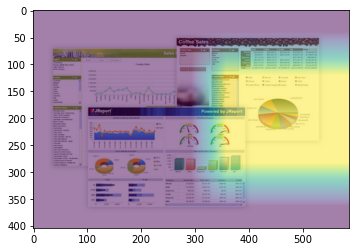

In [6]:
prob = c
mask = tf.cast(prob > 0.9, tf.int32)
mask = tf.reshape(mask, (1,) + mask.shape)
mask = tf.image.resize(mask, (404, 586))

fig, ax = plt.subplots()
ax.imshow(np.array(img))
ax.imshow(mask[0, ..., 2], alpha=0.5)

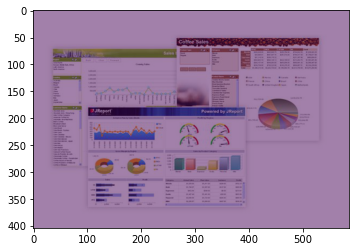

In [10]:
fig, ax = plt.subplots()
ax.imshow(np.array(img))
ax.imshow(mask[0, ..., 4], alpha=0.5)